# Do students from South Indian states really excel at Math and Science?

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
np.random.seed(5)
pd.set_option('chained_assignment',None)
%matplotlib notebook

In [53]:
df1 = pd.read_csv("./dataset/nas-columns.csv")

In [54]:
df1.head(5)

,Name,Rename,Type
0,PQ2,Gender,Group
1,DIST,District,NaN
2,STATE,State,NaN
3,PQ3,Age,Group
4,PQ4,Category,NaN


In [55]:
df2 = pd.read_csv('./dataset/nas-labels.csv')
df2[df2['Column']=="State"]

,Column,Name,Level,Rename
208,State,AN,AN,Andaman & Nicobar
209,State,AP,AP,Andhra Pradesh
210,State,AR,AR,Arunachal Pradesh
211,State,BR,BR,Bihar
212,State,CG,CG,Chattisgarh
213,State,CH,CH,Chandigarh
214,State,DD,DD,Daman & Diu
215,State,DL,DL,Delhi
216,State,DN,DN,Dadra & Nagar Haveli
217,State,GA,GA,Goa


In [56]:
df3 = pd.read_csv("./dataset/nas-pupil-marks.csv")

In [57]:
df3.head(5)

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.78,70.00,NaN,NaN
3,11011001004,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,NaN,56.67,NaN,36.00
4,11011001005,AP,1,2,3,3,2,5,2,1,...,3,2,3,3,4,4,NaN,NaN,14.55,8.33


In [58]:
df3.columns

Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same language', 'Siblings', 'Handicap', 'Father edu', 'Mother edu',
       'Father occupation', 'Mother occupation', 'Below poverty',
       'Use calculator', 'Use computer', 'Use Internet', 'Use dictionary',
       'Read other books', '# Books', 'Distance', 'Computer use',
       'Library use', 'Like school', 'Subjects', 'Give Lang HW',
       'Give Math HW', 'Give Scie HW', 'Give SoSc HW', 'Correct Lang HW',
       'Correct Math HW', 'Correct Scie HW', 'Correct SocS HW',
       'Help in Study', 'Private tuition', 'English is difficult',
       'Read English', 'Dictionary to learn', 'Answer English WB',
       'Answer English aloud', 'Maths is difficult', 'Solve Maths',
       'Solve Maths in groups', 'Draw geometry', 'Explain answers',
       'SocSci is difficult', 'Historical excursions', 'Participate in SocSci',
       'Small groups in SocSci', 'Express SocSci views',
       'Science is difficult', 'Observe e

In [59]:
dfx = df3[['STUID', 'State']]

# remove 'STUID', 'State', 'District' from the Dataset

In [60]:
nd = df3[['Gender', 'Age', 'Category',
       'Same language', 'Siblings', 'Handicap', 'Father edu', 'Mother edu',
       'Father occupation', 'Mother occupation', 'Below poverty',
       'Use calculator', 'Use computer', 'Use Internet', 'Use dictionary',
       'Read other books', '# Books', 'Distance', 'Computer use',
       'Library use', 'Like school', 'Subjects', 'Give Lang HW',
       'Give Math HW', 'Give Scie HW', 'Give SoSc HW', 'Correct Lang HW',
       'Correct Math HW', 'Correct Scie HW', 'Correct SocS HW',
       'Help in Study', 'Private tuition', 'English is difficult',
       'Read English', 'Dictionary to learn', 'Answer English WB',
       'Answer English aloud', 'Maths is difficult', 'Solve Maths',
       'Solve Maths in groups', 'Draw geometry', 'Explain answers',
       'SocSci is difficult', 'Historical excursions', 'Participate in SocSci',
       'Small groups in SocSci', 'Express SocSci views',
       'Science is difficult', 'Observe experiments', 'Conduct experiments',
       'Solve science problems', 'Express science views', 'Watch TV',
       'Read magazine', 'Read a book', 'Play games', 'Help in household',
       'Maths %', 'Reading %', 'Science %', 'Social %']]

# Maping Categorical of 'use computer' and 'Subjects' to numerical value

In [61]:
nd['Use computer'] = nd['Use computer'].map({"Yes":1,"No":0})
nd['Subjects'] = nd['Subjects'].map({'L':1, 'S':2, 'O':3, 'M':4, '0':0})

# Preprosessing NaN value 

In [62]:
from sklearn.preprocessing import Imputer

In [63]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(nd)
tx = imp.transform(nd) 

# Thresholding

In [64]:
dc=['Gender', 'Age', 'Category',
       'Same language', 'Siblings', 'Handicap', 'Father edu', 'Mother edu',
       'Father occupation', 'Mother occupation', 'Below poverty',
       'Use calculator', 'Use computer', 'Use Internet', 'Use dictionary',
       'Read other books', '# Books', 'Distance', 'Computer use',
       'Library use', 'Like school', 'Subjects', 'Give Lang HW',
       'Give Math HW', 'Give Scie HW', 'Give SoSc HW', 'Correct Lang HW',
       'Correct Math HW', 'Correct Scie HW', 'Correct SocS HW',
       'Help in Study', 'Private tuition', 'English is difficult',
       'Read English', 'Dictionary to learn', 'Answer English WB',
       'Answer English aloud', 'Maths is difficult', 'Solve Maths',
       'Solve Maths in groups', 'Draw geometry', 'Explain answers',
       'SocSci is difficult', 'Historical excursions', 'Participate in SocSci',
       'Small groups in SocSci', 'Express SocSci views',
       'Science is difficult', 'Observe experiments', 'Conduct experiments',
       'Solve science problems', 'Express science views', 'Watch TV',
       'Read magazine', 'Read a book', 'Play games', 'Help in household',
       'Maths %', 'Reading %', 'Science %', 'Social %']
data = pd.DataFrame(tx,columns=dc)

In [65]:
data.head(2)

,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,Mother edu,Father occupation,Mother occupation,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,1.0,3.0,3.0,1.0,5.0,2.0,1.0,1.0,3.0,3.0,...,3.0,3.0,4.0,3.0,4.0,4.0,20.37,46.208704,27.78,38.357868
1,2.0,3.0,4.0,2.0,5.0,2.0,2.0,1.0,7.0,3.0,...,3.0,4.0,4.0,3.0,4.0,4.0,12.96,46.208704,38.18,38.357868


In [66]:
# Create a new column name stClass which defines as the best performance student
# as 1 : consider best performance
# as 0 : consider poor performance

In [67]:
# Find the Performance by adding the Math, Science

In [68]:
math    = np.array(data["Maths %"]).astype("float")
Science = np.array(data["Science %"]).astype("float")
performance = (math+Science)

In [76]:
np.where(math==np.min(math))

(array([  1110,   1136,   2689,   7468,   7472,   8322,  12212,  12956,
         14543,  15922,  20795,  24577,  24744,  24754,  30237,  30580,
         45061,  50028,  53457,  57458,  57462,  57465,  57477,  58757,
         61565,  61744,  62753,  65448,  67953,  67985,  69555,  76131,
         77580,  79409,  87013,  88852,  88856,  94804,  97496, 109322,
        117676, 118061, 119109, 120004, 122112, 124986, 124990, 124991,
        124995, 125060, 125429, 125434, 125443, 128076, 129684, 130482,
        130973, 132029, 132290, 137058, 137846, 141280, 142527, 142585,
        142938, 143298, 144136, 145039, 150861, 151213, 152231, 153006,
        153361, 154454, 154457, 154486, 154491, 154898, 154998, 156869,
        158114, 159292, 160060, 161811, 167524, 168952, 170622, 181490]),)

In [77]:
np.where(Science==np.min(Science))

(array([    31,   1808,   3312,   7475,   8315,  13538,  13663,  15448,
         15452,  18149,  18188,  18552,  19113,  22971,  25137,  26062,
         26627,  27893,  28319,  54196,  55045,  57357,  57361,  57393,
         57457,  57462,  57465,  57466,  57469,  57483,  59606,  60661,
         62009,  62778,  63956,  65311,  70430,  70649,  70772,  70781,
         76128,  81830,  84307,  87708,  96123,  97925,  98657, 115324,
        117071, 117322, 117542, 120538, 124616, 124985, 125069, 125442,
        126052, 132031, 132055, 132613, 133147, 133709, 139066, 139402,
        140669, 142241, 142908, 143385, 144018, 144935, 146222, 148734,
        150577, 151439, 152235, 152342, 152447, 153163, 153340, 153672,
        153680, 153915, 153931, 153943, 154619, 154988, 154991, 155061,
        155568, 155581, 157354, 157743, 158075, 158265, 158794, 160053,
        163640, 167975, 170132, 170855, 177134, 181468, 181734]),)

In [69]:
bestPerformance = np.max(performance)
poorPerformance = np.min(performance)
avgPerformance  = np.average(performance)

In [70]:
poorPerformance

0.0

In [19]:
# Find the Thresholing

In [34]:
Threshold = bestPerformance-avgPerformance
super_threshold_indices = performance > Threshold
a = np.copy(performance)
a[super_threshold_indices] = 1
a[~super_threshold_indices]= 0

In [35]:
# now check all student whos performance greater than 200 are consider as best

In [36]:
performance = pd.DataFrame(performance,columns=["performance"])
Stclass     = pd.DataFrame(a,columns=["Stclass"])
state = pd.DataFrame(np.array(df3['State']),columns=["state"])

In [37]:
modDf = pd.concat([state,data,performance,Stclass],axis=1)

In [38]:
modDf.head(5)

,state,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,Mother edu,Father occupation,...,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %,performance,Stclass
0,AP,1.0,3.0,3.0,1.0,5.0,2.0,1.0,1.0,3.0,...,4.0,3.0,4.0,4.0,20.370000,46.208704,27.780000,38.357868,48.150000,0.0
1,AP,2.0,3.0,4.0,2.0,5.0,2.0,2.0,1.0,7.0,...,4.0,3.0,4.0,4.0,12.960000,46.208704,38.180000,38.357868,51.140000,0.0
2,AP,2.0,3.0,4.0,2.0,5.0,2.0,1.0,1.0,0.0,...,3.0,3.0,4.0,4.0,27.780000,70.000000,36.414637,38.357868,64.194637,0.0
3,AP,2.0,3.0,3.0,2.0,4.0,2.0,1.0,1.0,3.0,...,3.0,3.0,4.0,4.0,32.244413,56.670000,36.414637,36.000000,68.659051,0.0
4,AP,2.0,3.0,3.0,2.0,5.0,2.0,1.0,1.0,3.0,...,3.0,3.0,4.0,4.0,32.244413,46.208704,14.550000,8.330000,46.794413,0.0


In [39]:
sNm=modDf.state.unique()
sNm

array(['AP', 'AR', 'BR', 'CG', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH',
       'KA', 'KL', 'MP', 'MH', 'MN', 'MG', 'MZ', 'NG', 'OR', 'PB', 'RJ',
       'SK', 'TN', 'TR', 'UP', 'UK', 'WB', 'AN', 'CH', 'PY', 'DN', 'DD'], dtype=object)

In [40]:
southInd = ['AP','GA','KA','KL','PY','TN']

In [41]:
def girlVsboy(modDf,state_name):
    state_           = modDf[modDf["state"]==state_name]
    state_boy        = state_[state_['Gender']==1].reset_index(drop=True)
    state_girl       = state_[state_['Gender']==2].reset_index(drop=True)
    performance_boy  = state_boy['Stclass']
    performance_girl = state_girl['Stclass']
    return (performance_girl,performance_boy)

In [42]:
Total_nof_bestPrfmGr=[]
Total_nof_bestPrfmBy=[]
Total_nof_poorPrfmGr=[]
Total_nof_poorPrfmBy=[]

for i in southInd:
    tmp   = girlVsboy(modDf,i)
    bestG = np.sum(tmp[0])
    bestB = np.sum(tmp[1])
    poorG = len(tmp[0])-bestG
    poorB = len(tmp[1])-bestB
    Total_nof_bestPrfmGr.append(bestG)
    Total_nof_bestPrfmBy.append(bestB)
    Total_nof_poorPrfmGr.append(poorG)
    Total_nof_poorPrfmBy.append(poorB)

In [43]:
import plotly.plotly as py
import plotly.graph_objs as go

In [79]:
trace1 = go.Bar(
    x = southInd,
    y = Total_nof_bestPrfmGr,
    name='Girl'
)
trace2 = go.Bar(
    x = southInd,
    y = Total_nof_bestPrfmBy,
    name='Boy'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Best Performance of Girls and Boys South India',
    xaxis=dict(
        title='States',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='No of Student',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Best_Performance_of_Girls_and_Boys_South_India')

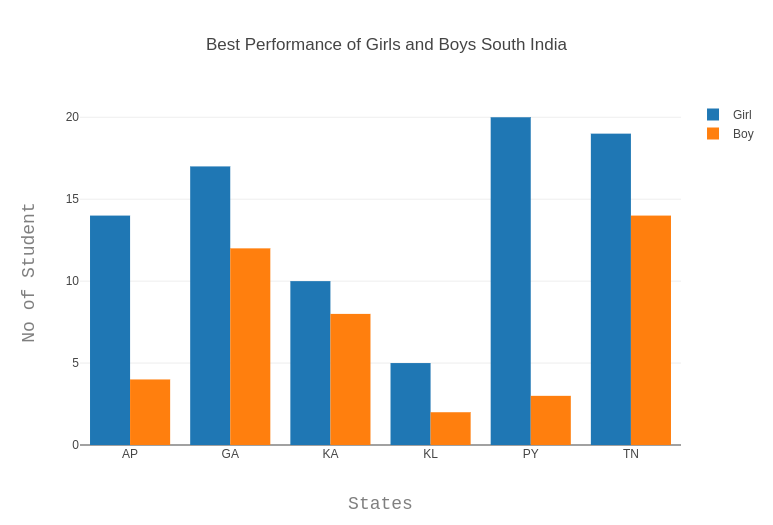

In [81]:
from IPython.display import Image
Image(filename='./images/south_india_bestperfromance.png')

In [80]:
trace1 = go.Bar(
    x = southInd,
    y = Total_nof_poorPrfmGr,
    name='Girl'
)
trace2 = go.Bar(
    x = southInd,
    y = Total_nof_poorPrfmBy,
    name='Boy'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Poor Performance of Girls and Boys South India',
    xaxis=dict(
        title='States',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='No of Student',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Poor_Performance_of_Girls_and_Boys_over_states')

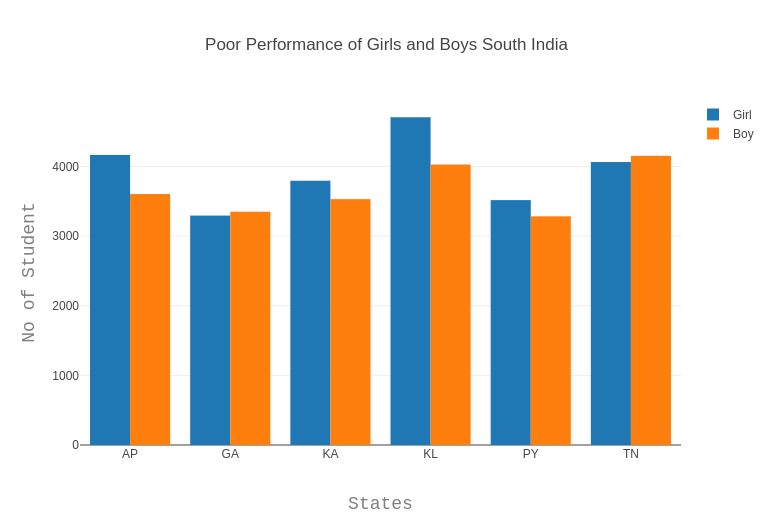

In [82]:
from IPython.display import Image
Image(filename='./images/south_india_poorPerformance.png')

In [1]:
# yes